In [1]:
# Import Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Reading the Data Dictionary

In [3]:
data_dict = pd.read_csv('data-dictionary+.csv')
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


## Reading the Dataset

In [4]:
# Import the Data
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Inspecting the Data

In [5]:
# Look at the shape of the data
data.shape

(167, 10)

**We can see that, there are 167 rows and 10 columns in the dataset.**

In [6]:
# Look at the data type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**From the above info, we can see that, 7 columns have 'float64' data type, 2 columns have 'int64' data type and 1 column has 'object' data type.
There are total 9 numeric columns and 1 categorical column.**

In [7]:
# Let's look at the data
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
# Look at the statistical summary of the data
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Data Cleaning

In [9]:
# Look at the missing values in the data
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**We can see that there are no missing values in our data.**

## Exploratory Data Analysis

### Data Preparation

**The columns 'exports', 'health' and 'imports, are showing the percentage of 'gdpp'. So we will convert these columns into their actual values.**

In [10]:
# Converting the columns 'exports', 'health', 'imports' into their actual values

data['exports'] = (data['exports'] * data['gdpp']) / 100
data['health'] = (data['health'] * data['gdpp']) / 100
data['imports'] = (data['imports'] * data['imports']) / 100

In [11]:
# Look at the head of the dataset after converting the columns 'exports', 'health', 'imports' to their actual values
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,20.1601,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,23.6196,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,9.8596,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,18.4041,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,34.6921,19100,1.44,76.8,2.13,12200


### Univariate Analysis

### child_mort variable

In [12]:
# Look at the statistical summary of the 'child_mort' column
data.child_mort.describe() 

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

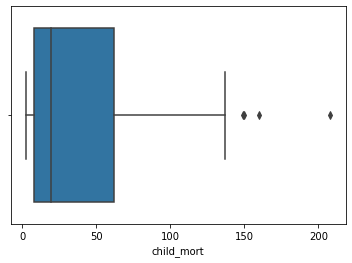

In [13]:
# Plot the boxplot of the 'child_mort' column
sns.boxplot(data.child_mort)
plt.show()

**We can see in the boxplot that there are outliers in the 'child_mort' column. We will treat them later.**

### income variable

In [14]:
# Look at the statistical summary of the 'income' column
data.income.describe()

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
max      125000.000000
Name: income, dtype: float64

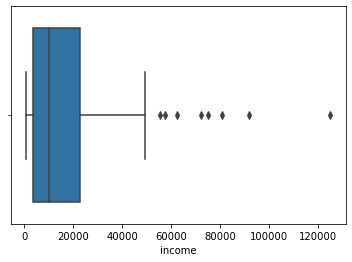

In [15]:
# Plot the boxplot of the 'income' column
sns.boxplot(data.income)
plt.show()

**We can see in the boxplot that there are outliers in the 'income' column. We will treat them later.**

### gdpp variable

In [16]:
# Look at the statistical summary of the 'gdpp' column
data.gdpp.describe()

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

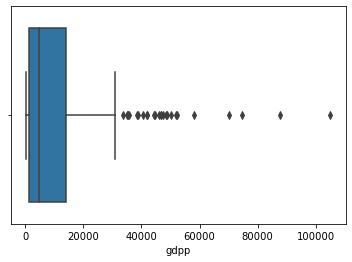

In [17]:
# Plot the boxplot of the 'gdpp' column
sns.boxplot(data.gdpp)
plt.show()

**We can see in the boxplot that there are outliers in the 'gdpp' column. We will treat them later.**

### exports variable

In [18]:
# Look at the statistical summary of the 'exports' column
data.exports.describe()

count       167.000000
mean       7420.618847
std       17973.885795
min           1.076920
25%         447.140000
50%        1777.440000
75%        7278.000000
max      183750.000000
Name: exports, dtype: float64

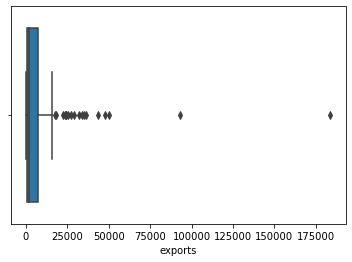

In [19]:
# Plot the boxplot of the 'exports' column
sns.boxplot(data.exports)
plt.show()

**We can see in the boxplot that there are outliers in the 'exports' column. We will treat them later.**

### inflation variable

In [20]:
# Look at the statistical summary of the 'inflation' variable
data.inflation.describe()

count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
max      104.000000
Name: inflation, dtype: float64

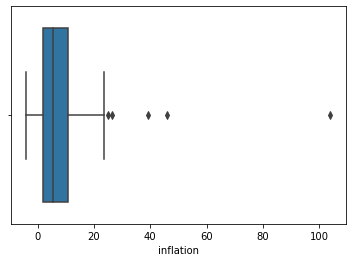

In [21]:
# Plot the boxplot of the 'inflation' column
sns.boxplot(data.inflation)
plt.show()

**We can see in the boxplot that there are outliers in the 'inflation' column. We will treat them later.**

### Bivariate Analysis

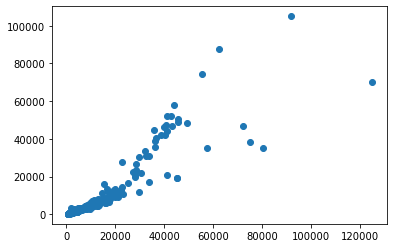

In [22]:
# Scatter plot of income and gdpp
plt.scatter(data.income, data.gdpp)
plt.show()

**We can see that from the above pairplot that income and gdp has linear relationship.**

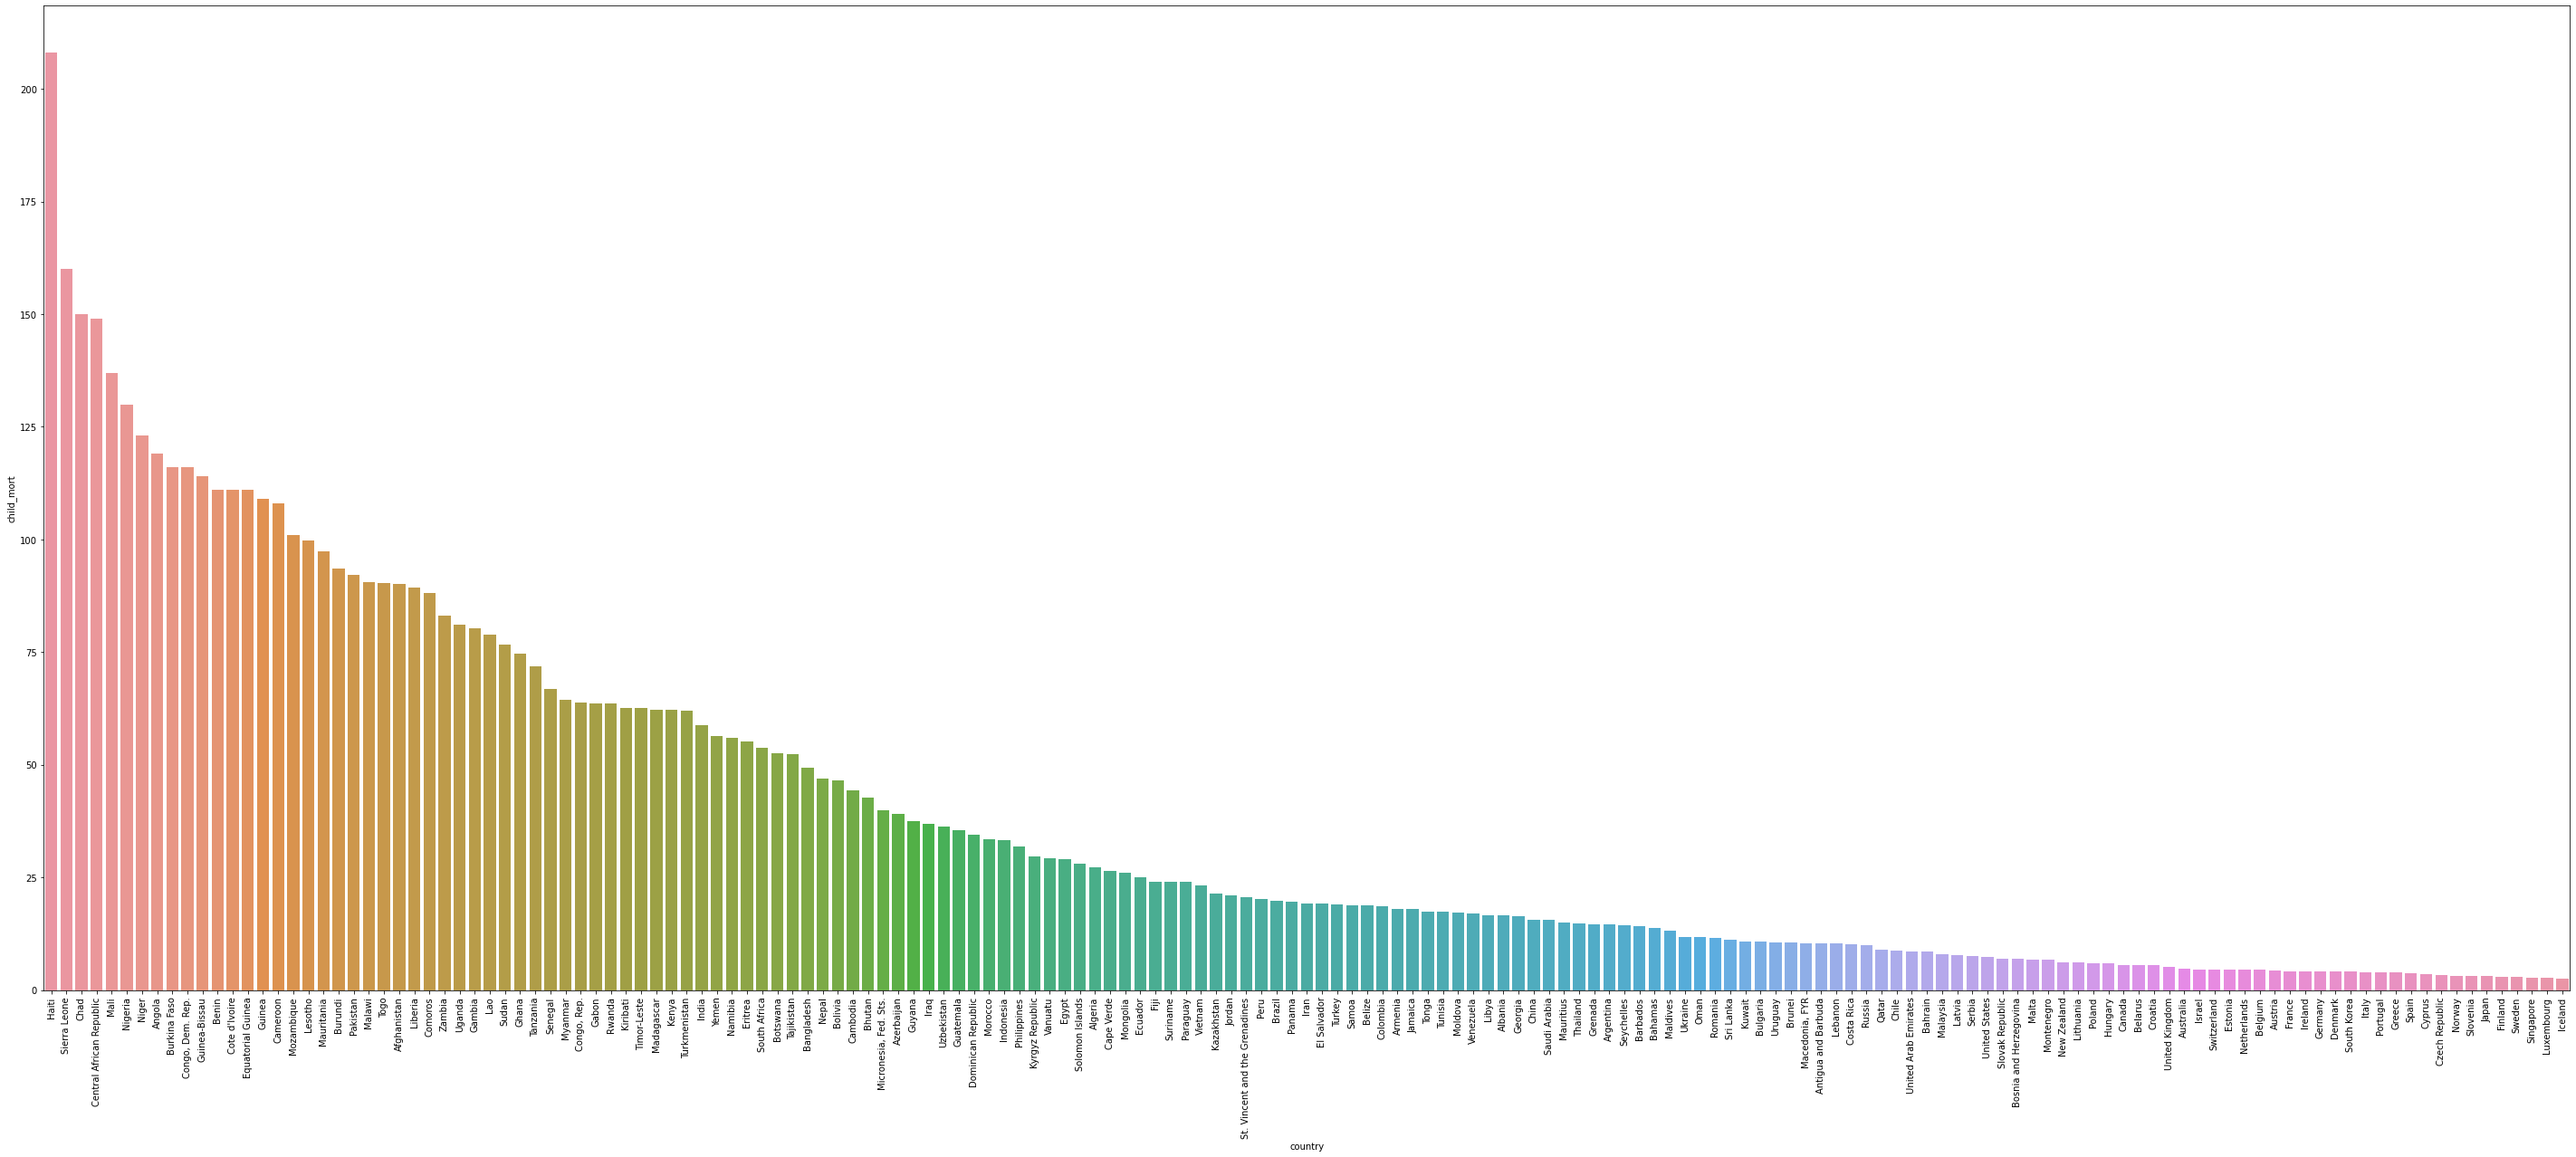

In [23]:
# Rate of child mortality
plt.figure(figsize=[50,20])
sns.barplot(x='country', y='child_mort', data=data[['country','child_mort']].sort_values('child_mort', ascending=False))
plt.xticks(rotation = 90)
plt.show()

We can see the child mortality rate of the countries.

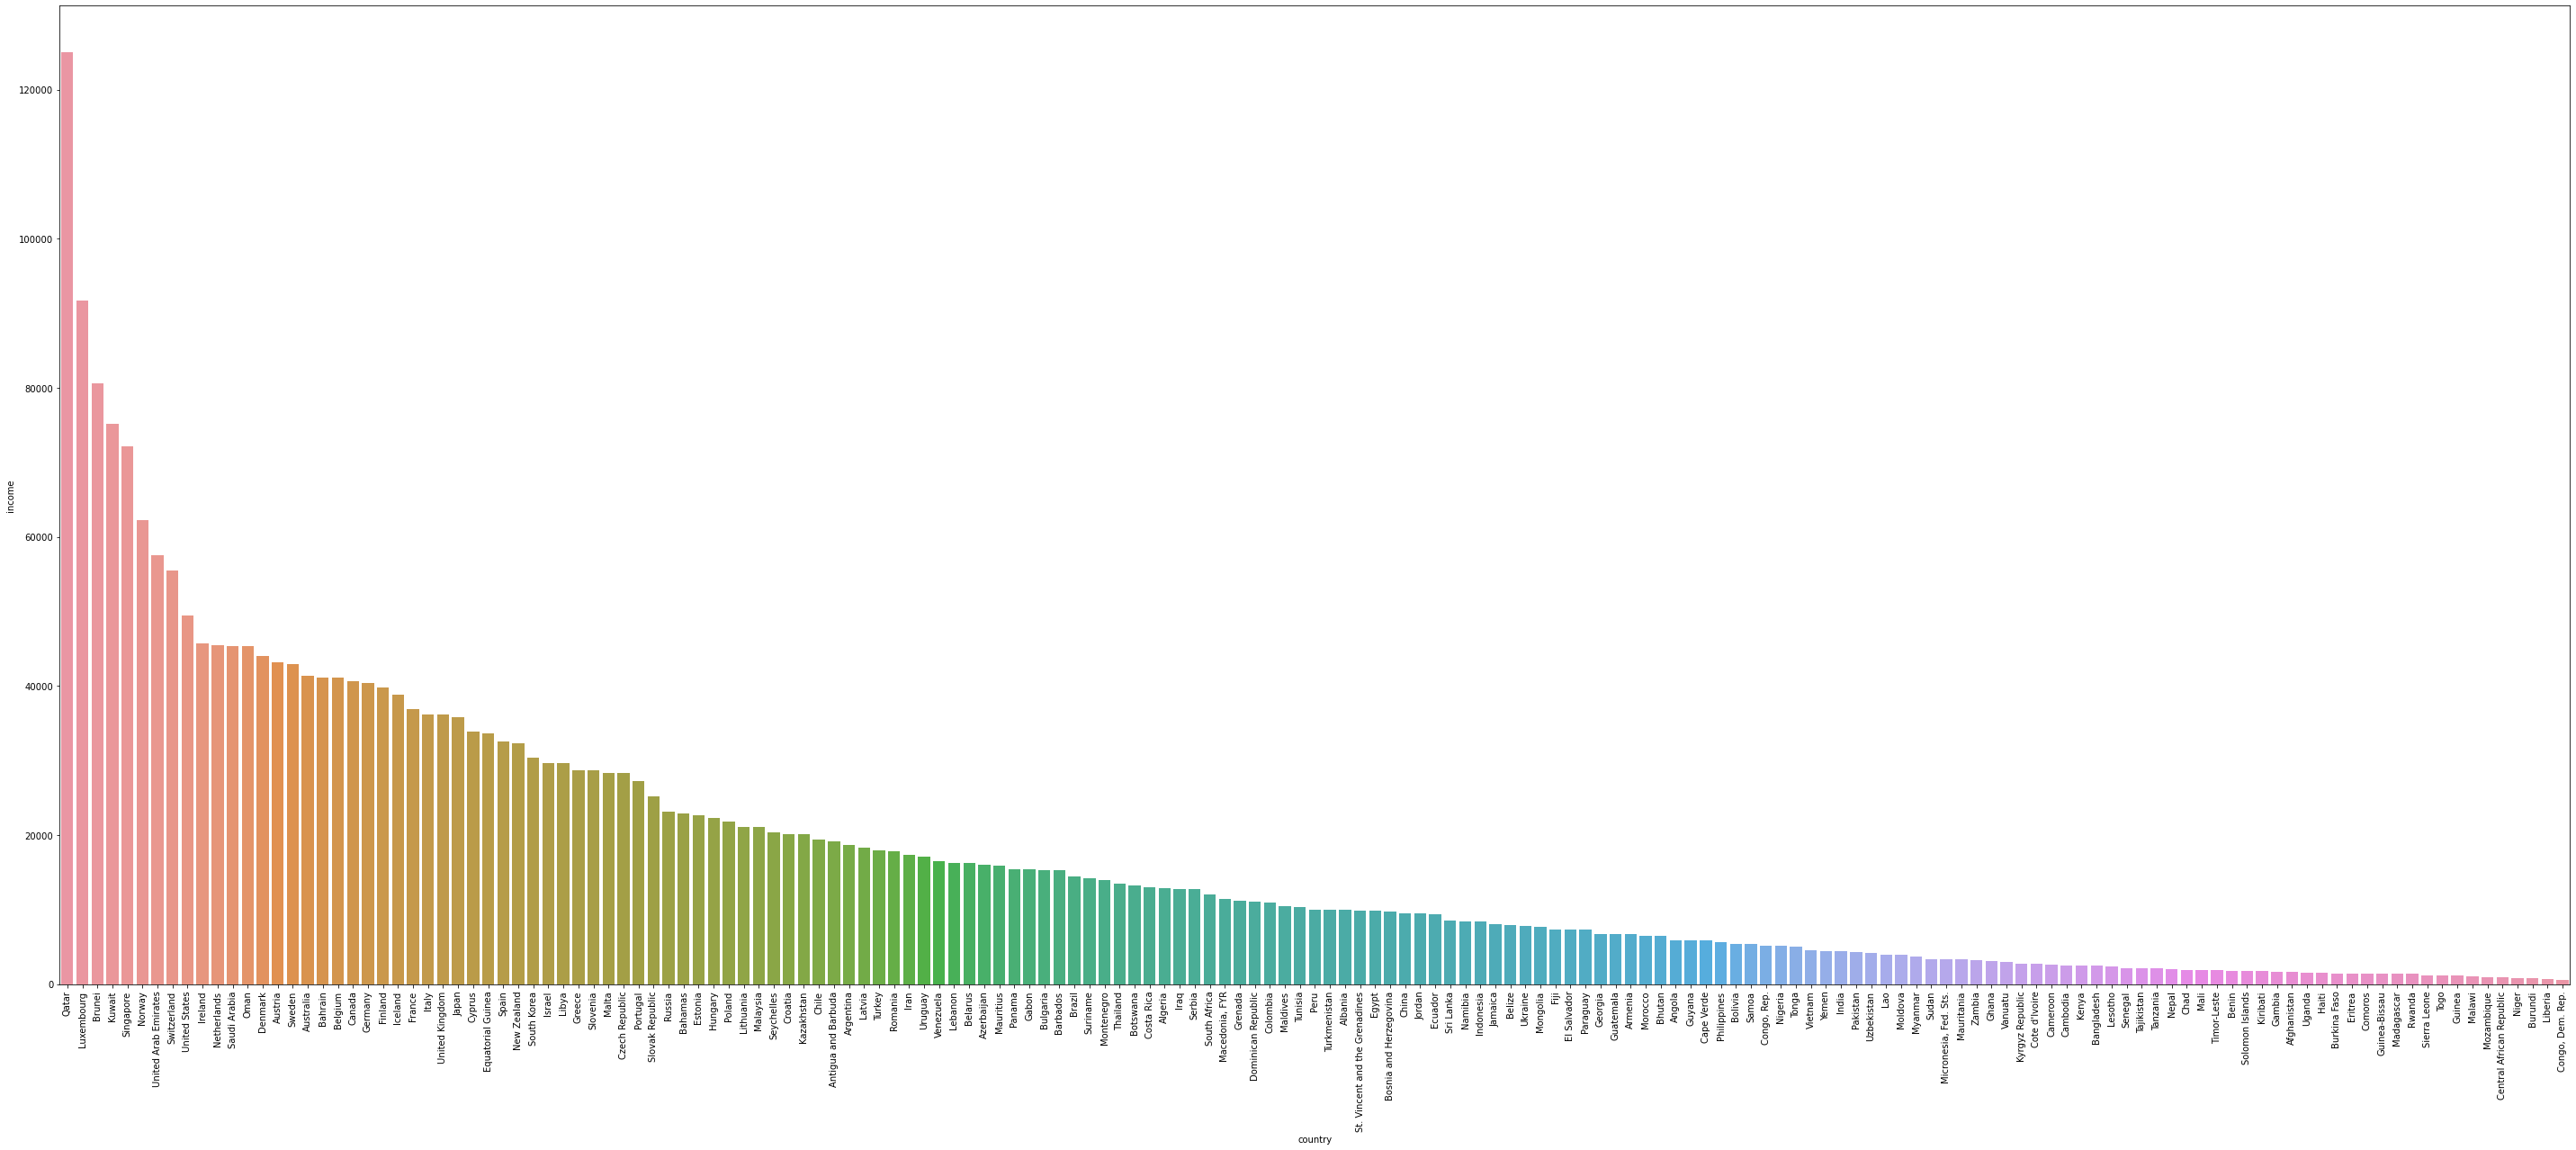

In [24]:
# Net income of per person across countries
plt.figure(figsize=[50,20])
sns.barplot(x='country', y='income', data=data[['country','income']].sort_values('income', ascending=False))
plt.xticks(rotation = 90)
plt.show()

We can see the net income per person of the countries.

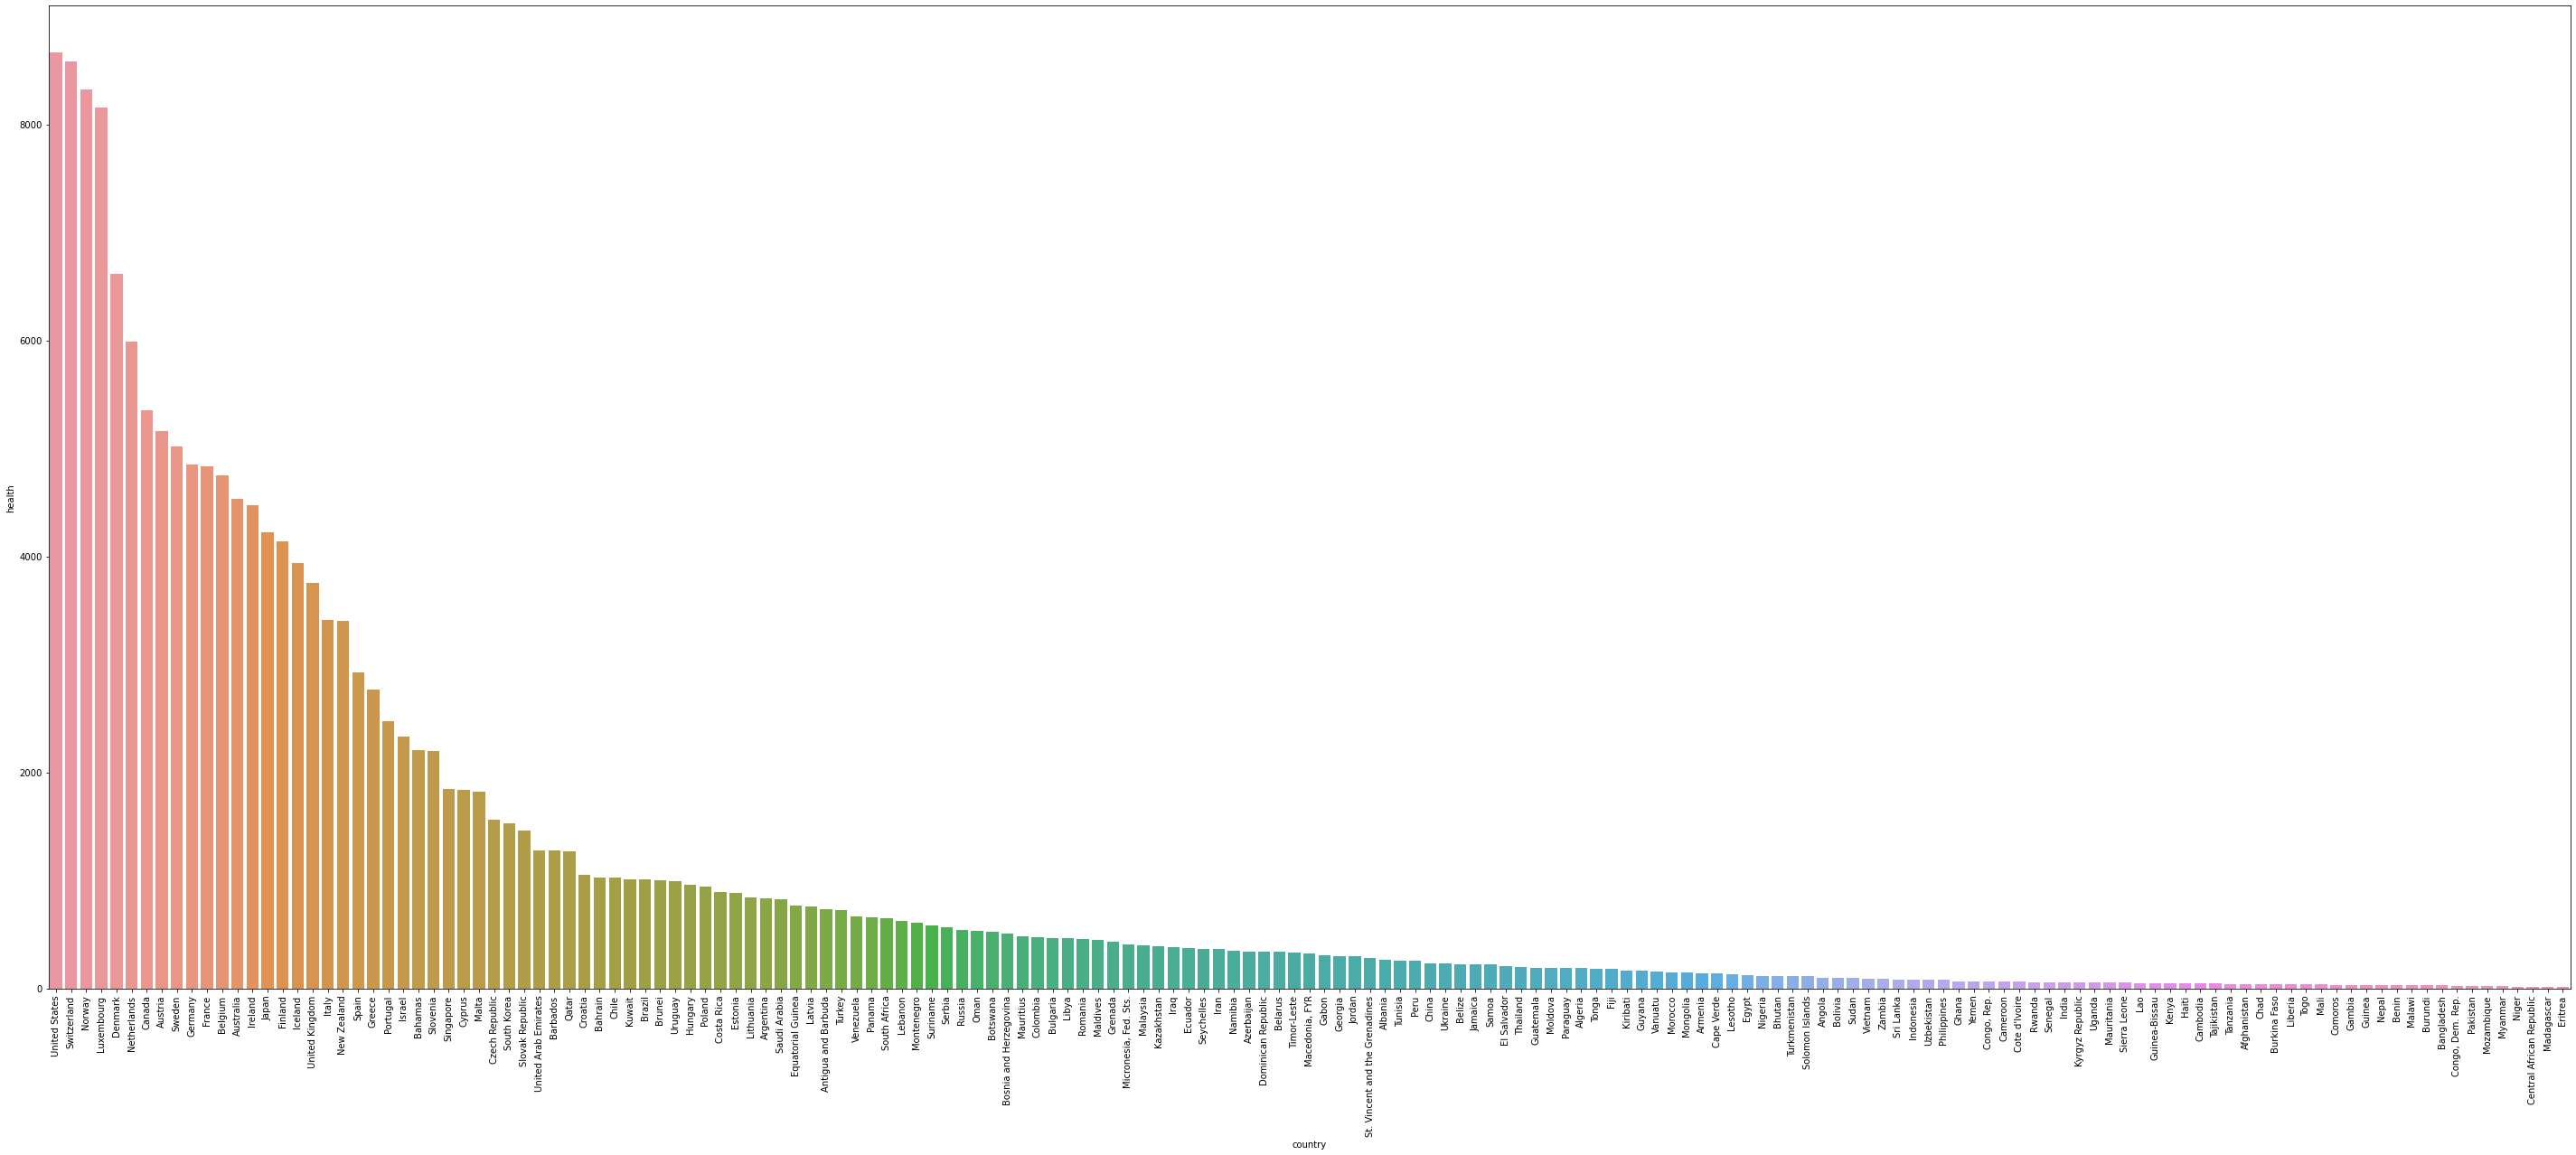

In [25]:
# Health expenditure across countries
plt.figure(figsize=[50,20])
sns.barplot(x='country', y='health', data=data[['country','health']].sort_values('health', ascending=False))
plt.xticks(rotation = 90)
plt.show()

We can see that the health expenditure of the countries.

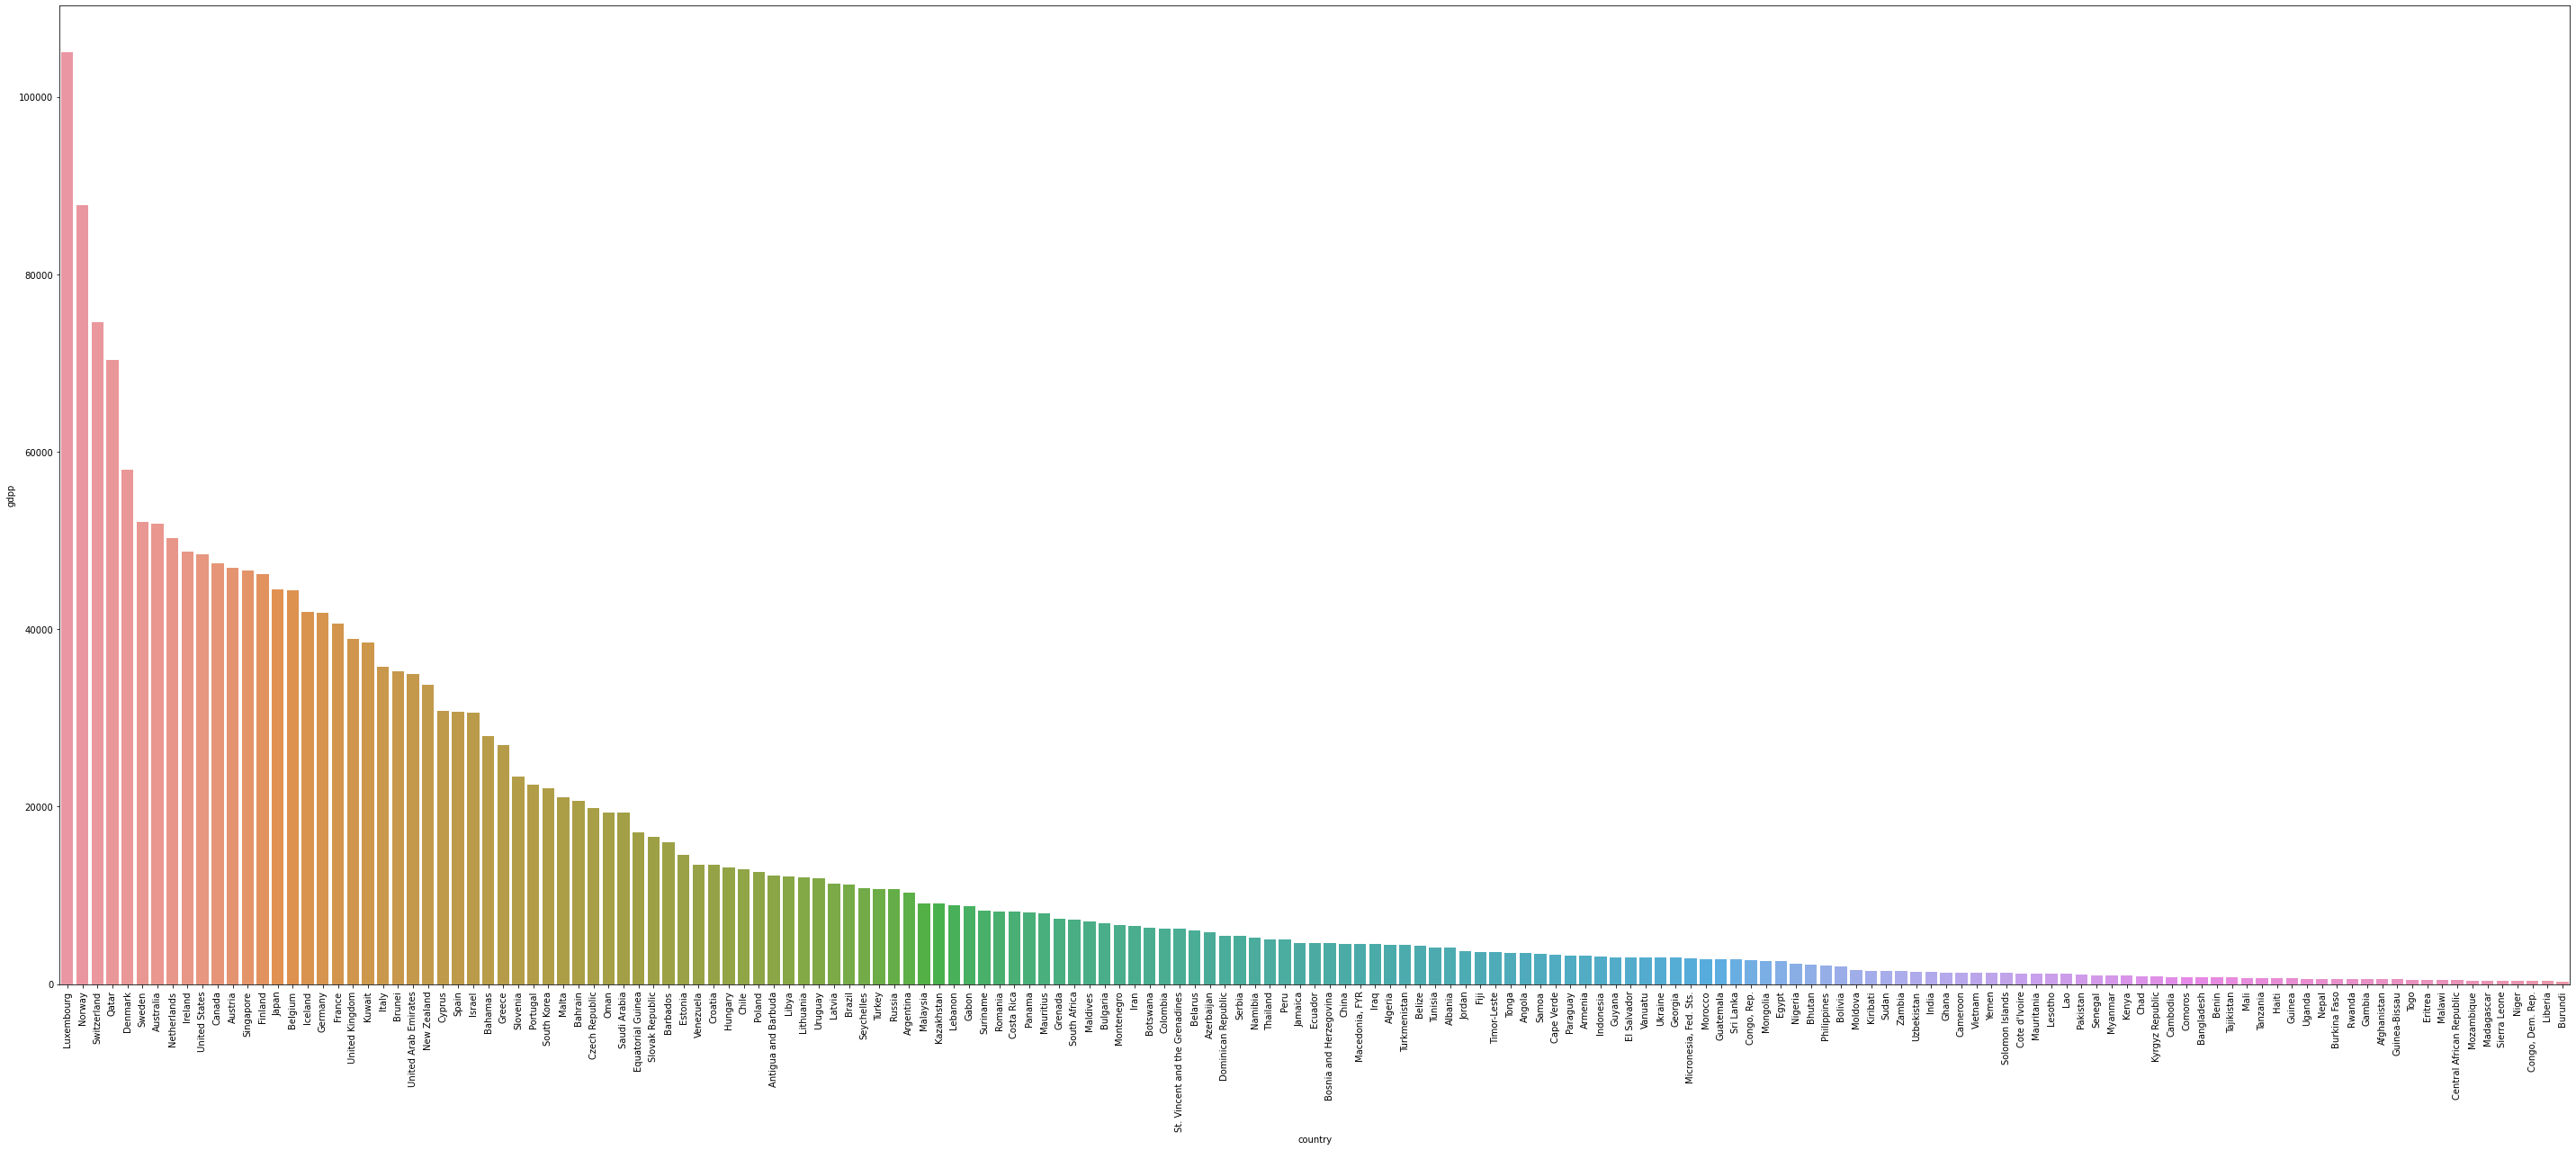

In [26]:
# GDP across countries
plt.figure(figsize=[50,20])
sns.barplot(x='country', y='gdpp', data=data[['country','gdpp']].sort_values('gdpp', ascending=False))
plt.xticks(rotation = 90)
plt.show()

We can see the GDP of countries.

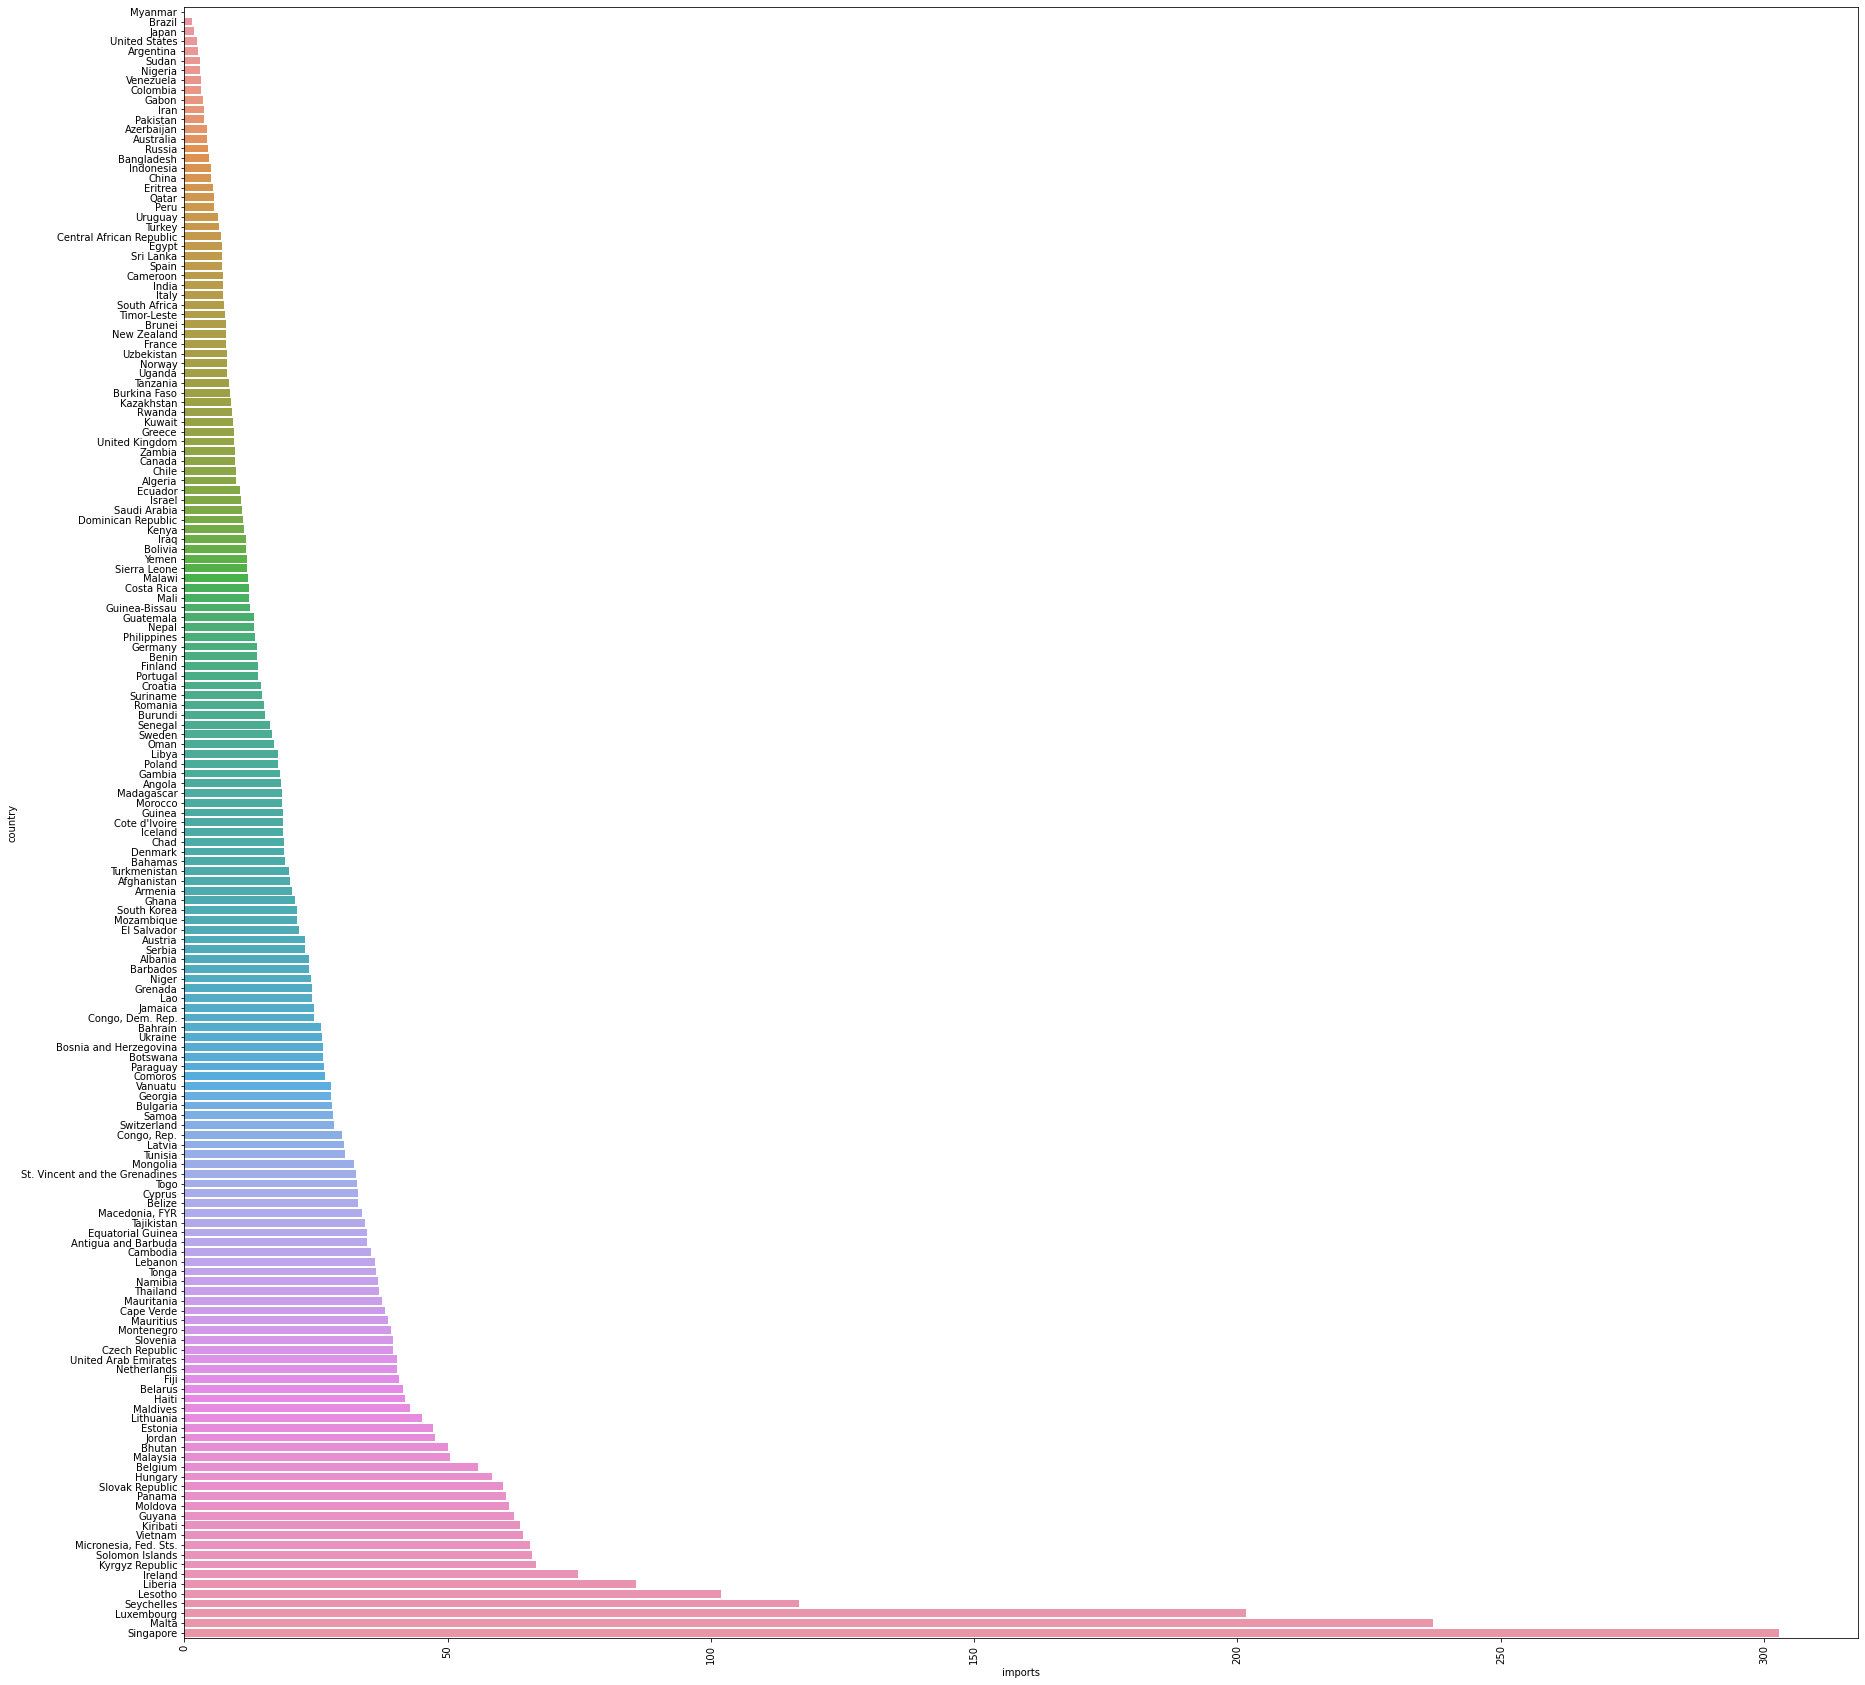

In [27]:
# Imports of countries
plt.figure(figsize = [30,30])
sns.barplot(x='imports', y='country', data = data[['country','imports']].sort_values('imports'))
plt.xticks(rotation=90)
plt.show()

We can see the imports of the countries.

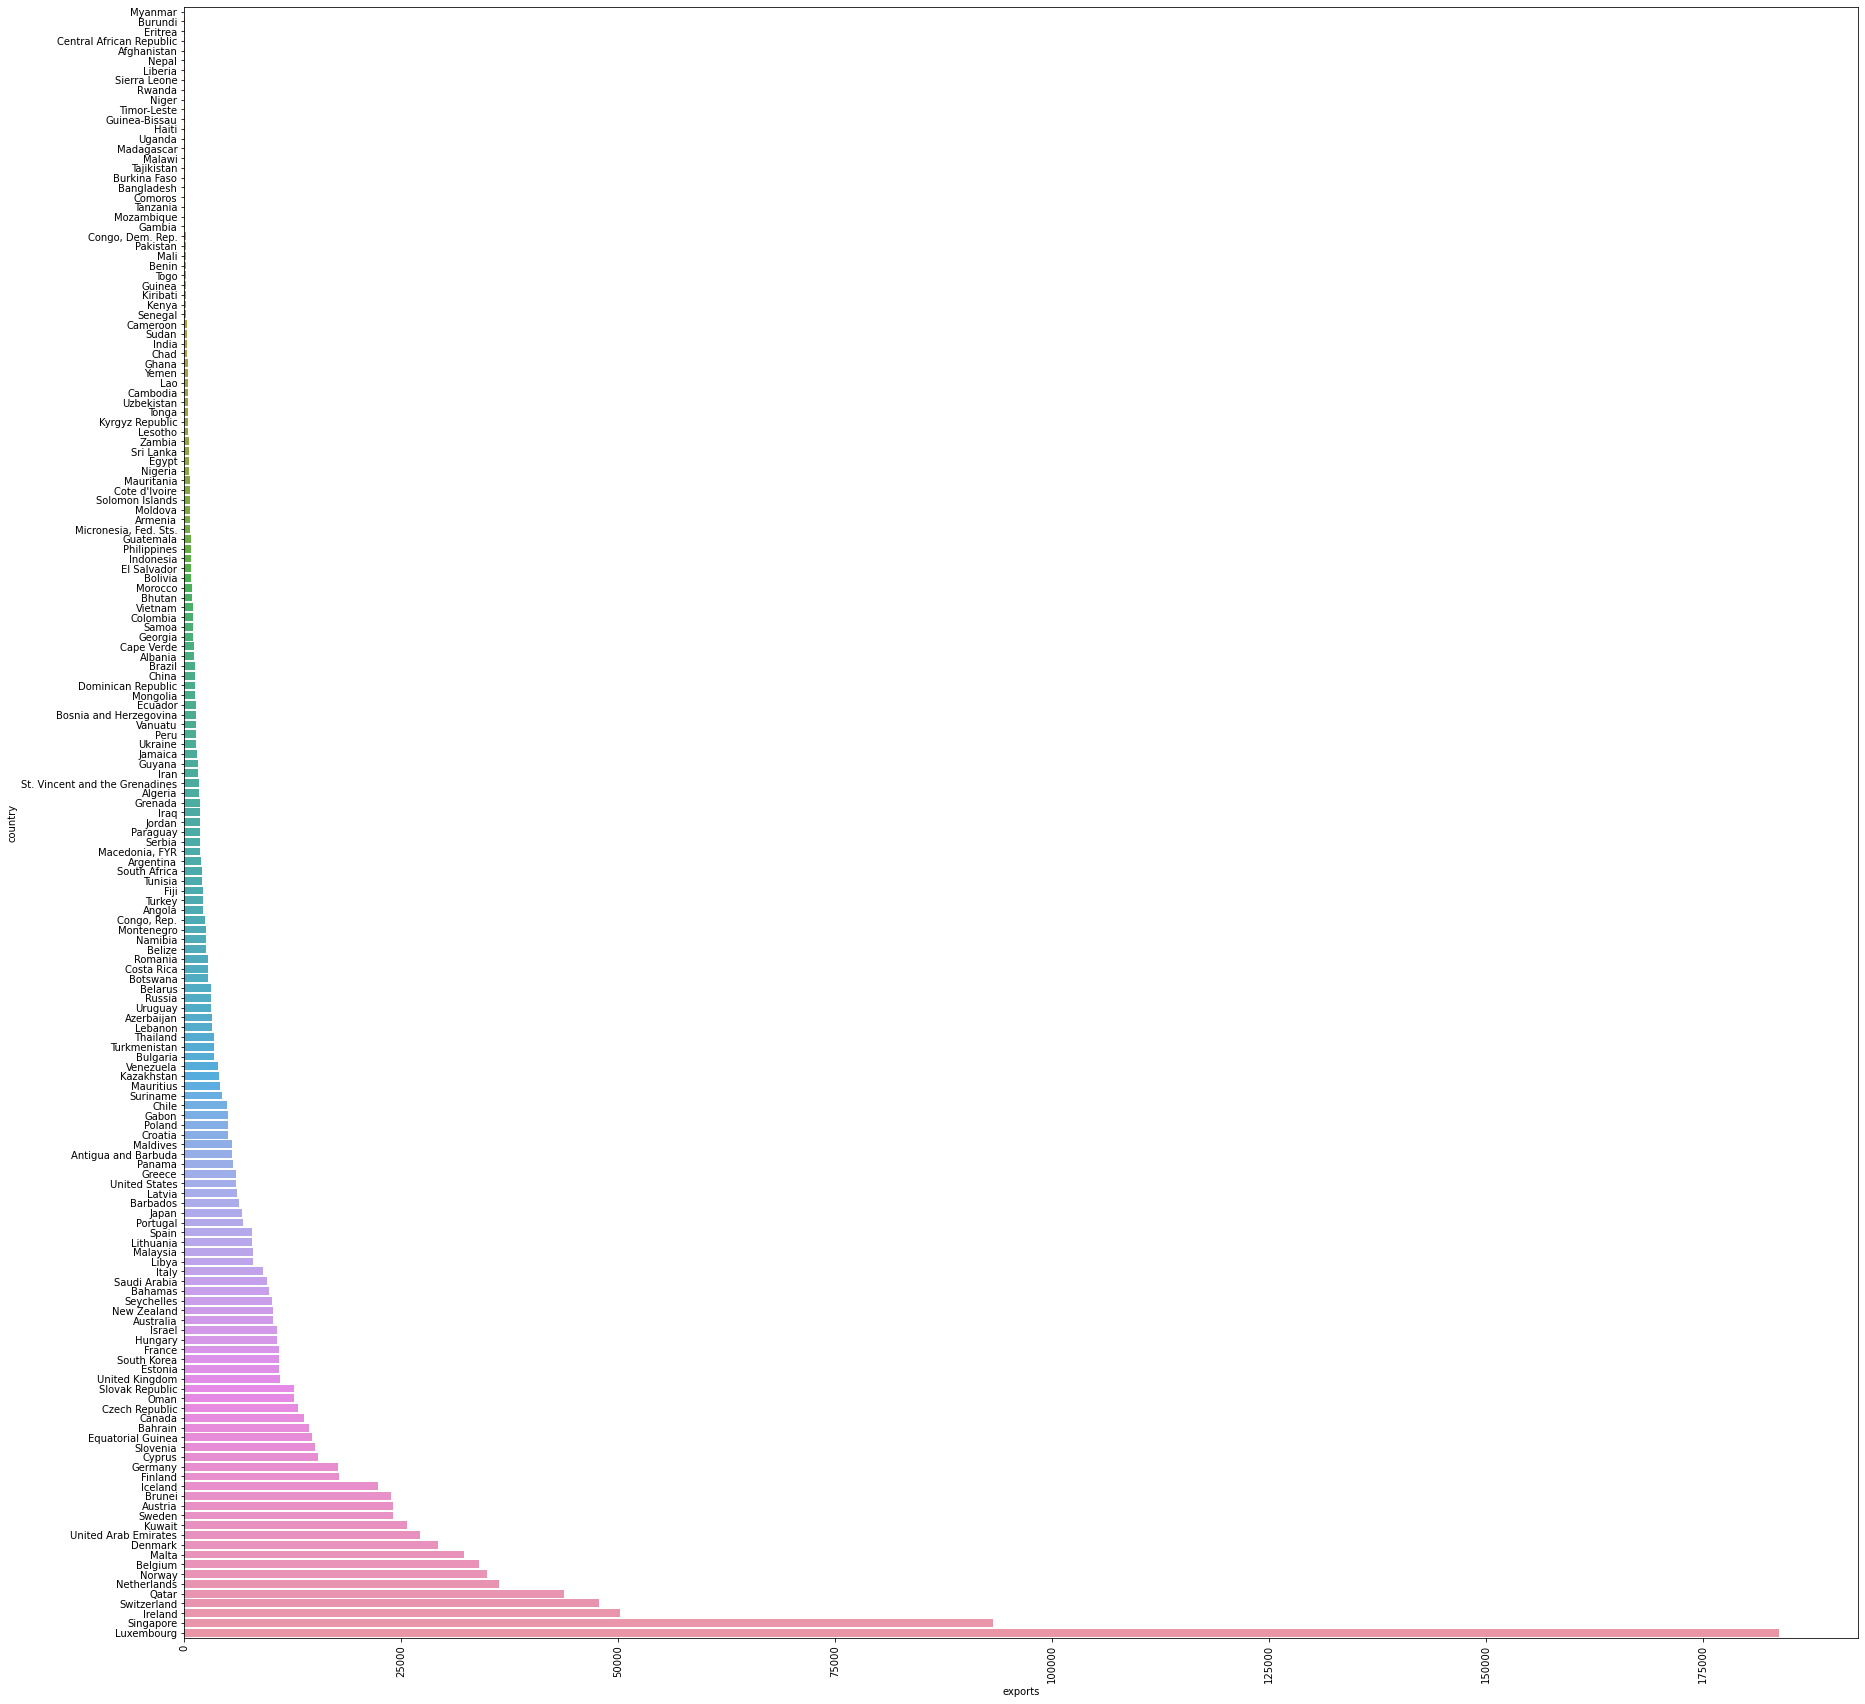

In [28]:
# Exports of countries
plt.figure(figsize = [30,30])
sns.barplot(x='exports', y='country', data = data[['country','exports']].sort_values('exports'))
plt.xticks(rotation=90)
plt.show()

We can see the exports of the countries.

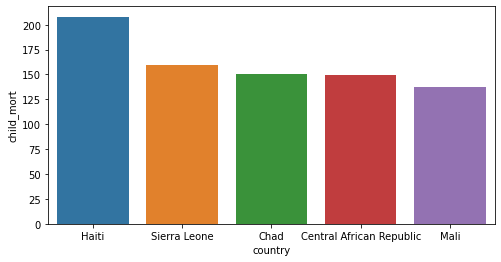

In [29]:
# Top 5 countries having high child mortality rate
plt.figure(figsize = [8,4])
sns.barplot(x='country', y='child_mort', data = data[['country','child_mort']].sort_values('child_mort', ascending = False).head())
plt.show()

We can see now see the top 5 countries having high child mortality rate. **Haiti** country has highest child mortality rate. 

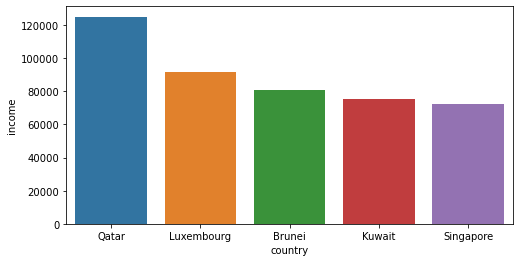

In [30]:
# Top 5 countries having high income
plt.figure(figsize = [8,4])
sns.barplot(x='country', y='income', data = data[['country','income']].sort_values('income', ascending = False).head())
plt.show()

We can now see the top 5 countries having high income. **Qatar** country has highest income.

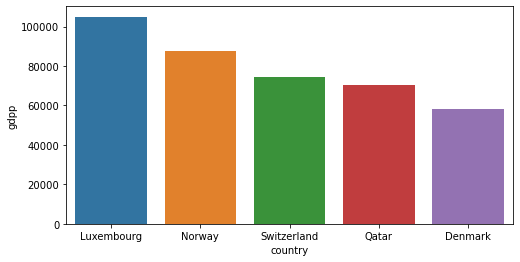

In [31]:
# Top 5 countries having high GDP
plt.figure(figsize = [8,4])
sns.barplot(x='country', y='gdpp', data = data[['country','gdpp']].sort_values('gdpp', ascending = False).head())
plt.show()

We can now see the top 5 countries having high GDP. **Luxembourg** country has highest GDP.

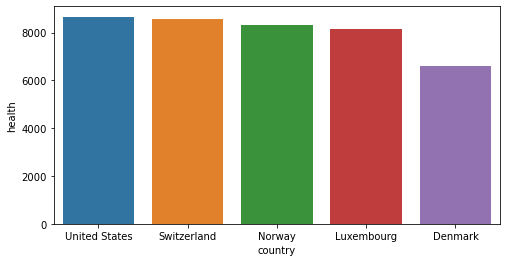

In [32]:
# Top 5 countries which spent high amount on health
plt.figure(figsize = [8,4])
sns.barplot(x='country', y='health', data = data[['country','health']].sort_values('health', ascending = False).head())
plt.show()

We can now see the top 5 countries which spent high amount on health. **United States** country spent highest amount on health.

### Multivariate Analysis

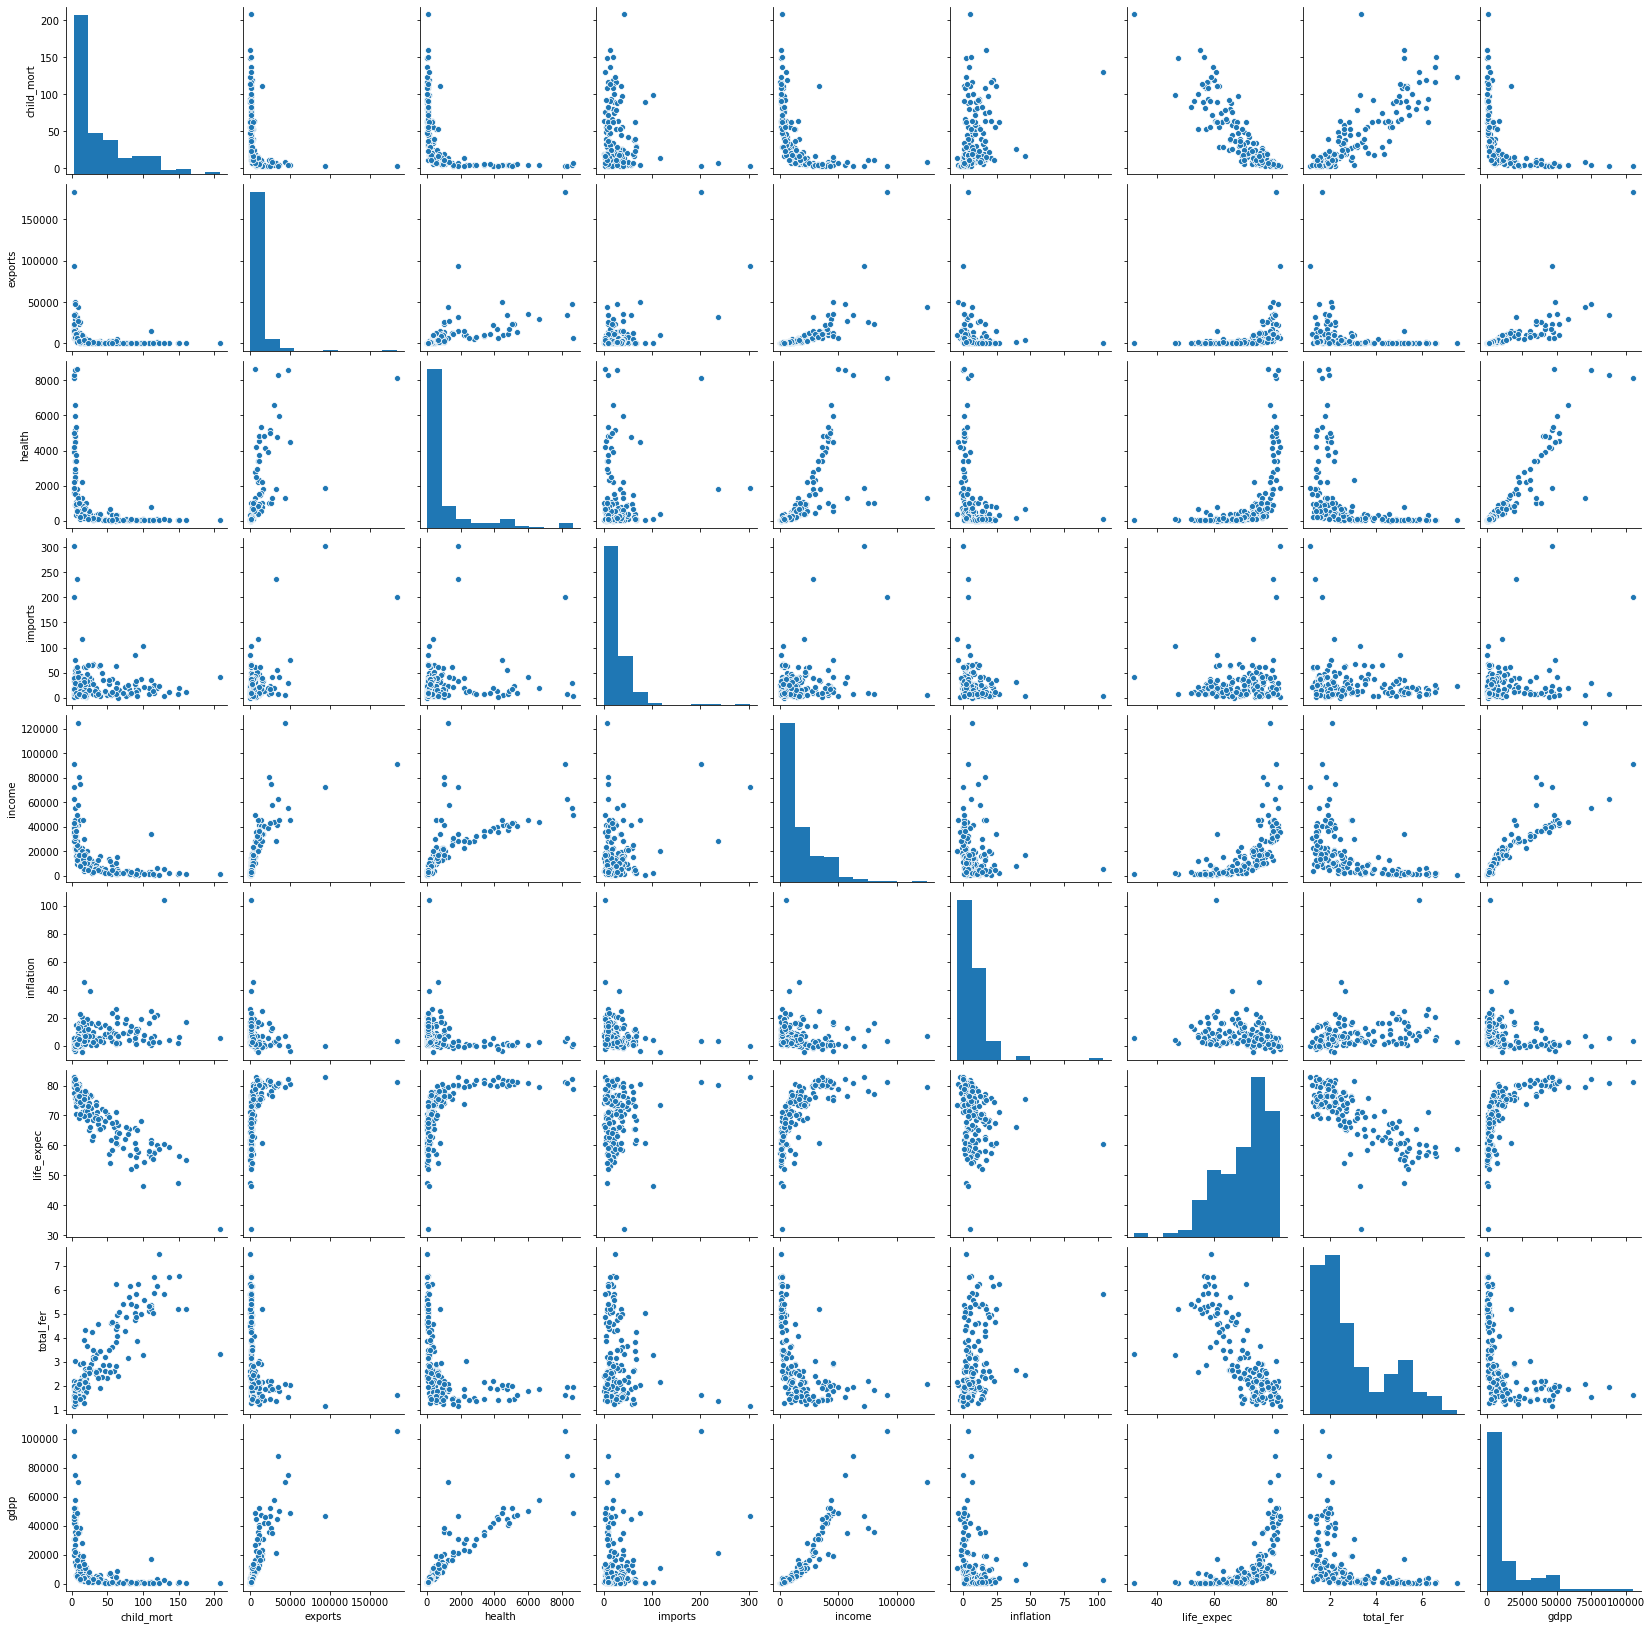

In [33]:
# Pairplot
sns.pairplot(data)
plt.show()

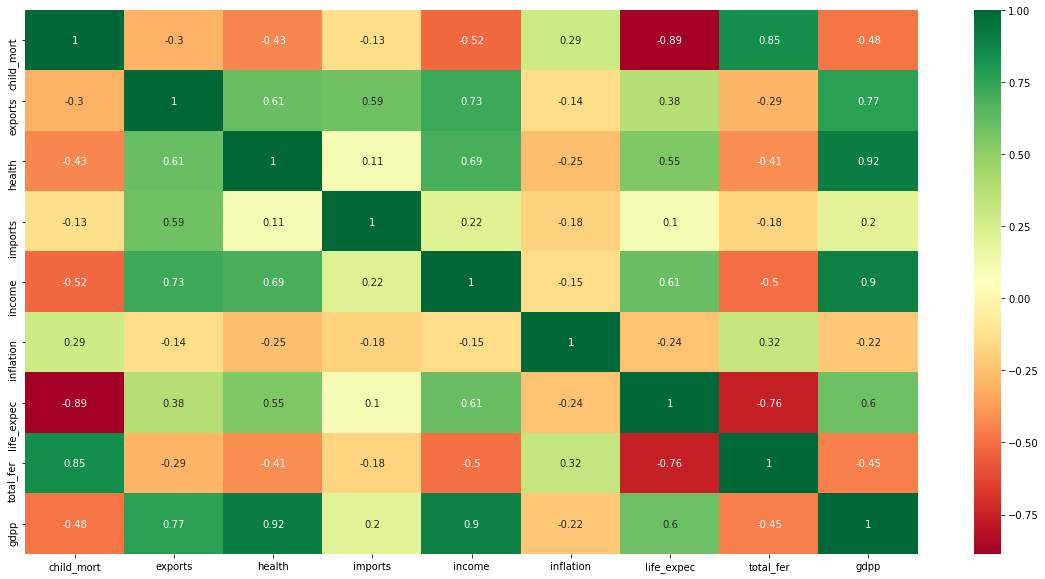

In [34]:
# Heatmap
plt.figure(figsize=[20,10])
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.show()

**From the above heatmap, we can see that, 'life_expec' and 'child_mort' columns have lowest correlation.<br>
'health' and 'gdpp' column have highest correlation.**

## Outlier Handling

We can check the outliers by looking at the statistical summary. We will look at the quantiles.

In [35]:
data.quantile([0.9, 0.95, 0.99, 0.99, 1])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0.90,100.22,17760.60,3825.4160,56.88954,41220.0,16.640,80.40,5.3220,41840.0
0.95,116.00,31385.10,4966.7010,65.83708,48290.0,20.870,81.40,5.8610,48610.0
0.99,153.40,64794.26,8410.3304,213.71680,84374.0,41.478,82.37,6.5636,79088.0
0.99,153.40,64794.26,8410.3304,213.71680,84374.0,41.478,82.37,6.5636,79088.0
1.00,208.00,183750.00,8663.6000,302.76000,125000.0,104.000,82.80,7.4900,105000.0


As we seen in the Univariate Analysis, 'child_mort', 'exports', 'income', 'inflation', 'gdpp' columns have outliers. We will cap the outliers. I will cap the High values outliers by 99 percentile value and Low value outliers by 1 percentile value.

In [36]:
# Capping of outliers in the 'child_mort' column
Q3 = data.child_mort.quantile(0.99)
Q1 = data.child_mort.quantile(0.01)
data['child_mort'][data['child_mort']<=Q1]=Q1
data['child_mort'][data['child_mort']>=Q3]=Q3

In [37]:
# Capping of outliers in the 'exports' column
Q3 = data.exports.quantile(0.99)
Q1 = data.exports.quantile(0.01)
data['exports'][data['exports']<=Q1]=Q1
data['exports'][data['exports']>=Q3]=Q3

In [38]:
# Capping of outliers in the 'income' column
Q3 = data.income.quantile(0.99)
Q1 = data.income.quantile(0.01)
data['income'][data['income']<=Q1]=Q1
data['income'][data['income']>=Q3]=Q3

In [39]:
# Capping of outliers in the 'inflation' column
Q3 = data.inflation.quantile(0.99)
Q1 = data.inflation.quantile(0.01)
data['inflation'][data['inflation']<=Q1]=Q1
data['inflation'][data['inflation']>=Q3]=Q3

In [40]:
# Capping of outliers in the 'gdpp' column
Q3 = data.gdpp.quantile(0.99)
Q1 = data.gdpp.quantile(0.01)
data['gdpp'][data['gdpp']<=Q1]=Q1
data['gdpp'][data['gdpp']>=Q3]=Q3

In [41]:
# Again look at the statistical summary of the data after capping of outliers
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.904790,6538.351334,1056.733204,27.812869,16858.601677,7.397332,70.555689,2.947964,12757.456527
std,39.026793,11415.230052,1801.408906,36.157512,17956.060832,7.770993,8.893172,1.513848,17429.755235
min,2.800000,22.243716,12.821200,0.000043,742.240000,-2.348800,32.100000,1.150000,331.620000
25%,8.250000,447.140000,78.535500,9.120800,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,18.748900,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,34.515850,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,153.400000,64794.260000,8663.600000,302.760000,84374.000000,41.478000,82.800000,7.490000,79088.000000


## Hopkins statistics test

In [42]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [43]:
hopkins(data.drop('country',axis = 1))

0.8864209841938666

## Scaling the features

In [44]:
# We will create new dataFrame on which we will perform scaling
data_d = data.drop('country', axis=1)

In [45]:
# Look at the head of the new DataFrame
data_d.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,20.1601,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,23.6196,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,9.8596,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,18.4041,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,34.6921,19100.0,1.44,76.8,2.13,12200.0


**We will perform the MinMaxScaling here.**

In [46]:
# Scaling of Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_d)

In [47]:
# After scaling we get NumPy array. We will convert the NumPy array to the DataFrame
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = data_d.columns
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.580345,0.000510,0.003363,0.066588,0.010376,0.268986,0.475345,0.736593,0.002811
1,0.091633,0.017337,0.029486,0.078014,0.109860,0.156042,0.871795,0.078864,0.047722
2,0.162683,0.026098,0.020017,0.032566,0.145373,0.420948,0.875740,0.274448,0.052420
3,0.771580,0.033609,0.010148,0.060788,0.061672,0.564696,0.552268,0.790221,0.040611
4,0.049801,0.085357,0.083558,0.114586,0.219507,0.086449,0.881657,0.154574,0.150697


## Model Building

To determine the value of K, there are two methods:
- **Elbow Curve** and 
- **Silhoutte Score**

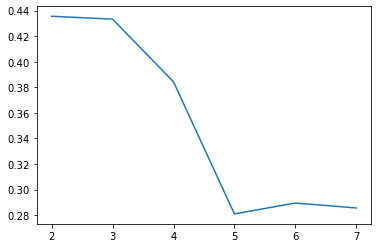

In [48]:
# Silhouette Score
d = []
for i in list(range(2,8)):
    kmeans = KMeans(n_clusters = i).fit(data_scaled)
    d.append([i, silhouette_score(data_scaled, kmeans.labels_)])

plt.plot(pd.DataFrame(d)[0], pd.DataFrame(d)[1])

### Elbow Curve

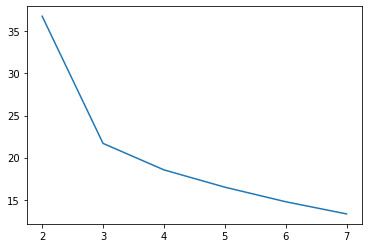

In [49]:
# Elbow Curve
d = []
for i in list(range(2,8)):
    kmeans = KMeans(n_clusters = i).fit(data_scaled)
    d.append([i, kmeans.inertia_])

plt.plot(pd.DataFrame(d)[0], pd.DataFrame(d)[1])

**From the above elbow curve it is good to take k=3.**

### Silhouette Score

In [50]:
# k=3
k_mean = KMeans(n_clusters = 3, random_state = 100)
k_mean.fit(data_scaled)

KMeans(n_clusters=3, random_state=100)

In [51]:
k_mean.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

In [52]:
cluster_no = pd.DataFrame(k_mean.labels_, columns = ['cluster_no'])

In [53]:
# Let's look at the head of the label
cluster_no.head()

,cluster_no
0,2
1,1
2,1
3,2
4,1


In [54]:
data_kmean = pd.concat([data, cluster_no], axis =1)

In [55]:
# Look at the head of the data after clustering
data_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
0,Afghanistan,90.2,55.30,41.9174,20.1601,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,23.6196,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,9.8596,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,18.4041,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,34.6921,19100.0,1.44,76.8,2.13,12200.0,1


In [56]:
# No. of countries in each cluster
data_kmean.cluster_no.value_counts()

1    92
2    44
0    31
Name: cluster_no, dtype: int64

### Visualisation of K-Means Clustering

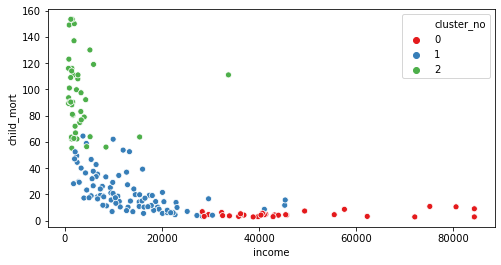

In [57]:
plt.figure(figsize=[8,4])
sns.scatterplot(x='income', y='child_mort', hue='cluster_no', data=data_kmean, palette='Set1')
plt.show()

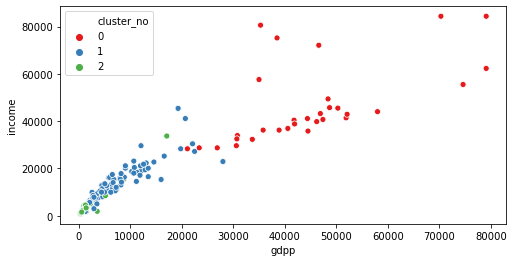

In [58]:
plt.figure(figsize=[8,4])
sns.scatterplot(x='gdpp', y='income', hue='cluster_no', data=data_kmean, palette='Set1')
plt.show()

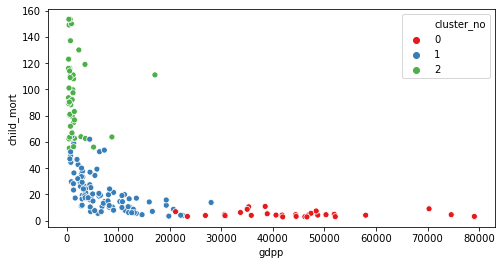

In [59]:
plt.figure(figsize=[8,4])
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_no', data=data_kmean, palette='Set1')
plt.show()

### Cluster Profiling

In [60]:
# Cluster Profiling: child_mort, income, gdpp
data_kmean[['child_mort','income','gdpp','cluster_no']].groupby('cluster_no').mean()

,child_mort,income,gdpp
cluster_no,,,
0,4.941935,46582.193548,44950.838710
1,21.869565,13302.934783,7224.913043
2,94.656818,3351.556364,1643.800909


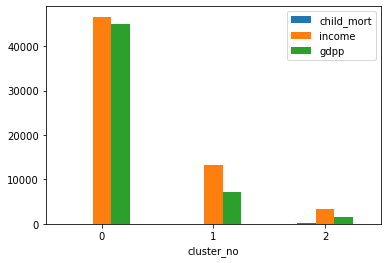

In [61]:
data_kmean[['child_mort','income','gdpp','cluster_no']].groupby('cluster_no').mean().plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

**I will try to identiy that cluster which is having high child_mort, low income and low GDP**

In [62]:
data_kmean.sort_values(by =['child_mort','income','gdpp'],ascending = [False,True,True]).country.head()

132                Sierra Leone
66                        Haiti
32                         Chad
31     Central African Republic
97                         Mali
Name: country, dtype: object

**The top 5 countries that are in the direst need of aid based on k-means clustering are as follows:**
1. Sierra Leone
2. Haiti
3. Chad
4. Central African Republic
5. Mali

## Hierarchical Clustering

### Single Linkage

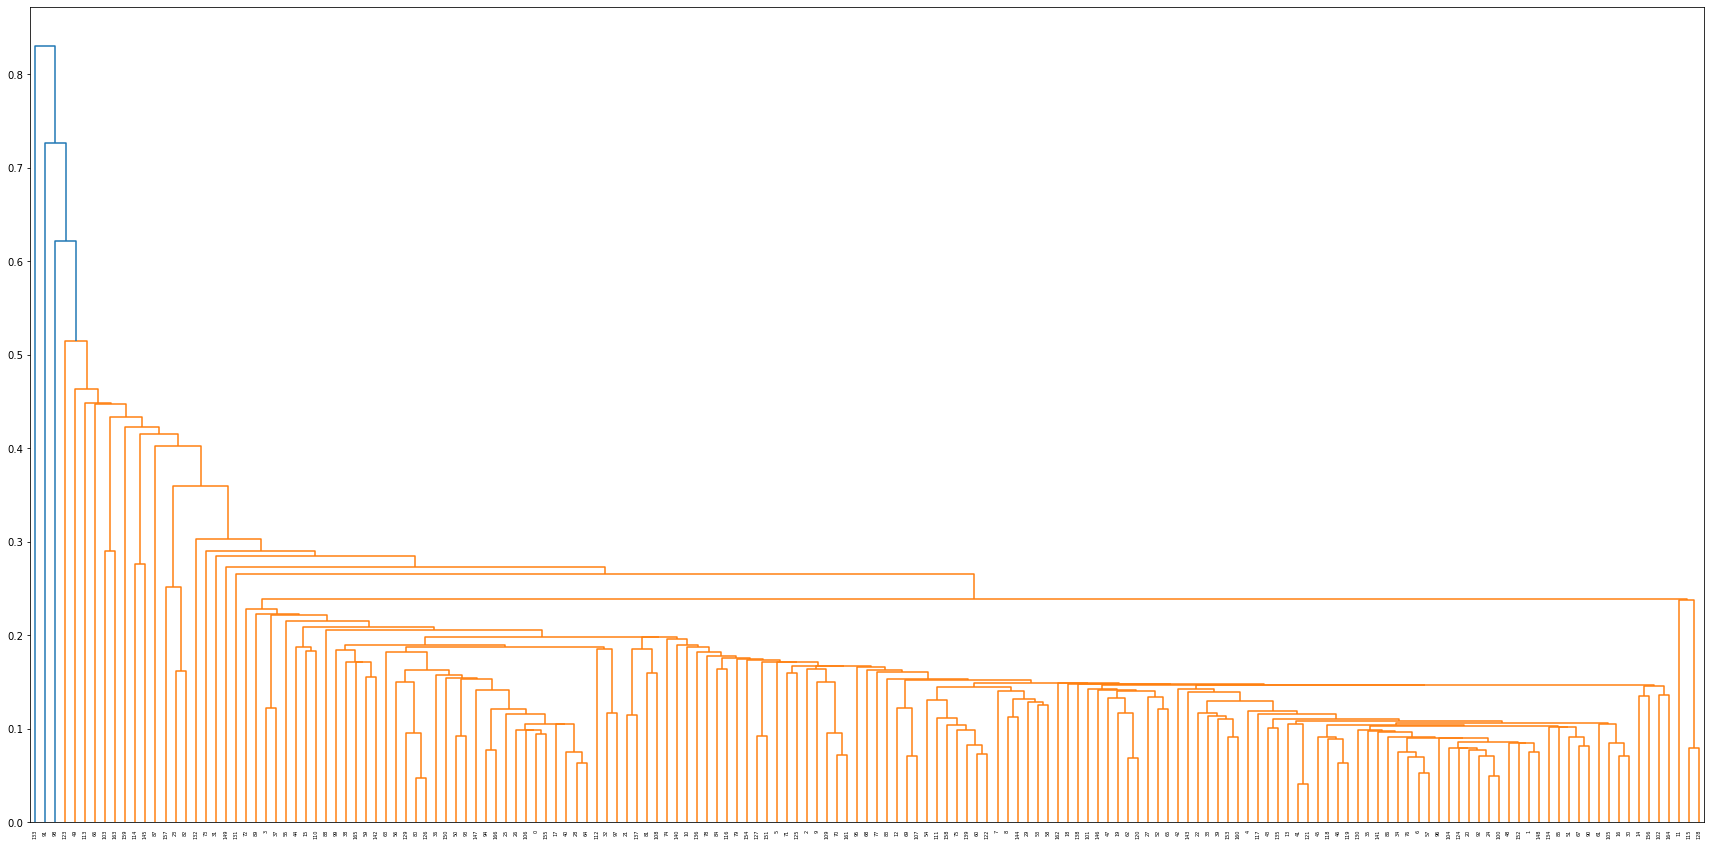

In [63]:
plt.figure(figsize = (30,15))
single_linkage = linkage(data_scaled, method='single',metric='euclidean')
dendrogram(single_linkage)
plt.show()

### Complete Linkage

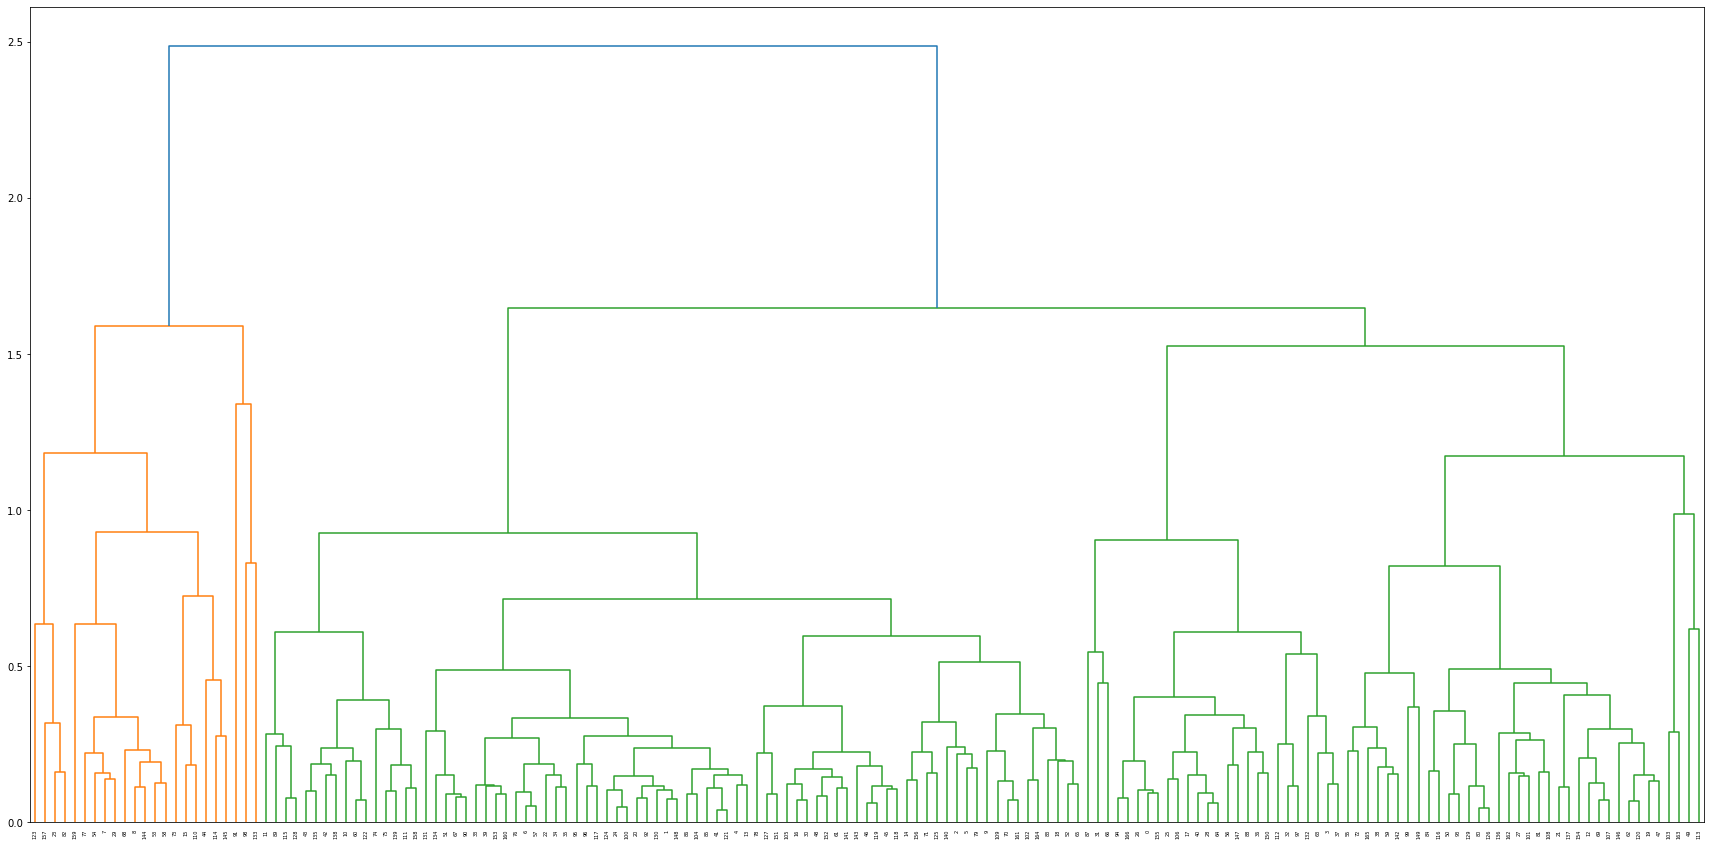

In [64]:
plt.figure(figsize = (30,15))
complete_linkage = linkage(data_scaled, method='complete',metric='euclidean')
dendrogram(complete_linkage)
plt.show()

In [65]:
data_hierarchical = data_kmean.drop('cluster_no', axis=1)
data_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,20.1601,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,23.6196,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,9.8596,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,18.4041,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,34.6921,19100.0,1.44,76.8,2.13,12200.0


In [66]:
# For Hierarchical clustering, we will use complete linkage
clustering_label=cut_tree(complete_linkage ,n_clusters=3).reshape(-1,)
clustering_label

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 0])

In [67]:
# Assign the clustering labels
data_hierarchical['cluster'] = clustering_label
data_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,20.1601,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,23.6196,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,9.8596,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,18.4041,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,34.6921,19100.0,1.44,76.8,2.13,12200.0,1


In [68]:
# No. of countries in each cluster
data_hierarchical.cluster.value_counts()

1    82
0    62
2    23
Name: cluster, dtype: int64

### Visualisation of Hierarchical Clustering

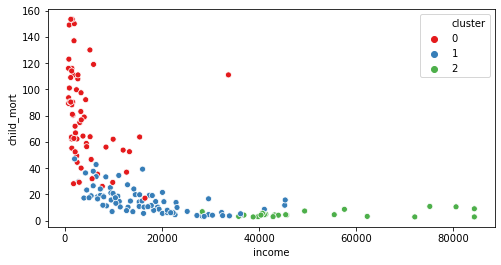

In [69]:
plt.figure(figsize=[8,4])
sns.scatterplot(x='income', y='child_mort', hue='cluster', data=data_hierarchical, palette='Set1')
plt.show()

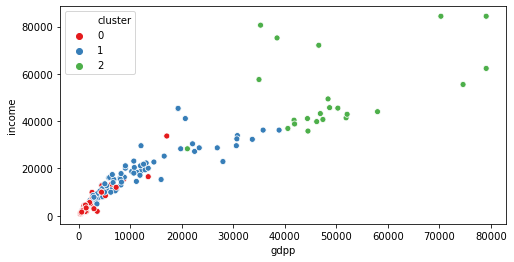

In [70]:
plt.figure(figsize=[8,4])
sns.scatterplot(x='gdpp', y='income', hue='cluster', data=data_hierarchical, palette='Set1')
plt.show()

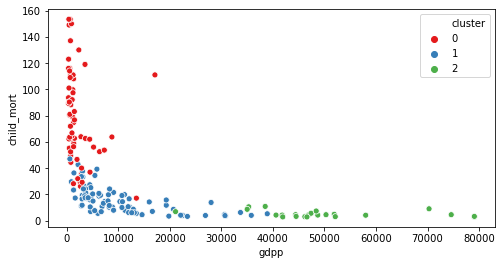

In [71]:
plt.figure(figsize=[8,4])
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster', data=data_hierarchical, palette='Set1')
plt.show()

### Cluster Profiling

In [72]:
# Cluster Profiling: child_mort, income, gdpp
data_hierarchical[['child_mort','income','gdpp','cluster']].groupby('cluster').mean()

,child_mort,income,gdpp
cluster,,,
0,79.401613,4362.394839,2134.310323
1,15.713415,16572.804878,10432.829268
2,5.160870,51562.956522,49681.565217


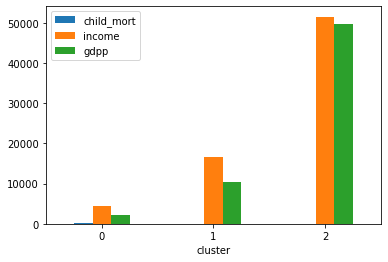

In [73]:
data_hierarchical[['child_mort','income','gdpp','cluster']].groupby('cluster').mean().plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

**I will try to identiy that cluster which is having high child_mort, low income and low GDP**

In [74]:
data_hierarchical.sort_values(by =['child_mort','income','gdpp'],ascending = [False,True,True]).country.head()

132                Sierra Leone
66                        Haiti
32                         Chad
31     Central African Republic
97                         Mali
Name: country, dtype: object

**The top 5 countries that are in the direst need of aid based on hierarchical clustering are as follows:**
1. Sierra Leone
2. Haiti
3. Chad
4. Central African Republic
5. Mali

## Final List of countries based on both K-means and Hierarchical Clustering

In [75]:
# To check in which cluster the countries are present
data_kmean.sort_values(by =['child_mort','income','gdpp'],ascending = [False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
132,Sierra Leone,153.4,67.032,52.2690,11.9025,1220.0,17.20,55.0,5.20,399.0,2
66,Haiti,153.4,101.286,45.7442,41.8609,1500.0,5.45,32.1,3.33,662.0,2
32,Chad,150.0,330.096,40.6341,18.9225,1930.0,6.39,56.5,6.59,897.0,2
31,Central African Republic,149.0,52.628,17.7508,7.0225,888.0,2.01,47.5,5.21,446.0,2
97,Mali,137.0,161.424,35.2584,12.3201,1870.0,4.37,59.5,6.55,708.0,2


**We can see that, these top 5 countries are in the cluster no. 2 for Kmeans clustering**

In [76]:
# Top 5 countries that are in the direst of need of the aid based on K-means clustering
top5_kmeans = data_kmean[data_kmean['cluster_no']==2].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head()
top5_kmeans['country']
top5_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
132,Sierra Leone,153.4,67.032,52.2690,11.9025,1220.0,17.20,55.0,5.20,399.0,2
66,Haiti,153.4,101.286,45.7442,41.8609,1500.0,5.45,32.1,3.33,662.0,2
32,Chad,150.0,330.096,40.6341,18.9225,1930.0,6.39,56.5,6.59,897.0,2
31,Central African Republic,149.0,52.628,17.7508,7.0225,888.0,2.01,47.5,5.21,446.0,2
97,Mali,137.0,161.424,35.2584,12.3201,1870.0,4.37,59.5,6.55,708.0,2


In [77]:
# To check in which cluster the countries are present
data_hierarchical.sort_values(by =['child_mort','income','gdpp'],ascending = [False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
132,Sierra Leone,153.4,67.032,52.2690,11.9025,1220.0,17.20,55.0,5.20,399.0,0
66,Haiti,153.4,101.286,45.7442,41.8609,1500.0,5.45,32.1,3.33,662.0,0
32,Chad,150.0,330.096,40.6341,18.9225,1930.0,6.39,56.5,6.59,897.0,0
31,Central African Republic,149.0,52.628,17.7508,7.0225,888.0,2.01,47.5,5.21,446.0,0
97,Mali,137.0,161.424,35.2584,12.3201,1870.0,4.37,59.5,6.55,708.0,0


**We can see that, these top 5 countries are in the cluster no. 0 for hierarchical clustering**

In [78]:
# Top 5 countries that are in the direst of need of the aid based on K-means clustering
top5_hierarchical = data_hierarchical[data_hierarchical['cluster']==0].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head()
top5_hierarchical['country']
top5_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
132,Sierra Leone,153.4,67.032,52.2690,11.9025,1220.0,17.20,55.0,5.20,399.0,0
66,Haiti,153.4,101.286,45.7442,41.8609,1500.0,5.45,32.1,3.33,662.0,0
32,Chad,150.0,330.096,40.6341,18.9225,1930.0,6.39,56.5,6.59,897.0,0
31,Central African Republic,149.0,52.628,17.7508,7.0225,888.0,2.01,47.5,5.21,446.0,0
97,Mali,137.0,161.424,35.2584,12.3201,1870.0,4.37,59.5,6.55,708.0,0


### Finally we got the  top 5 countries which are in the direst need of aid. These Countries are:
#### 1. Sierra Leone	
#### 2. Haiti	
#### 3. Chad
#### 4. Central African Republic
#### 5. Mali